# Simple Linear Regression. Minimal example

### Import the relevant libraries

In [55]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [56]:
# This is fake data with a linear relationship to prove our approache

observations = 1000

#f(x,z) = a*x + b*z + c
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs  = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


### Create the targets we will aim at

In [89]:
# targets = f(x,z) = 2*x - 3*z + 5 + noise. We introduce noise because real da-
# ta is never perfect, there is always some noise. Even with the noise the 
# underlying linear relationship will remain.

noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)


(1000, 1)


### Plot the training data

The point is to see that there is a strong trend that our model should learn to reproduce

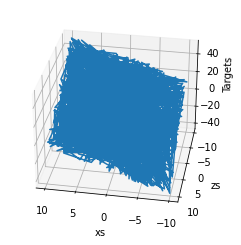

In [90]:
targets= targets.reshape(observations,)
xs = xs.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)
xs = xs.reshape(observations,1)

# In 3D linear relationships are a plane and in 2D a straight line

### Initialize variables

In [91]:
# We are going to pick our initial weights and biases randomly from the int-
# erval [-0.1,0.1]

init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))
biases = np.random.uniform(-init_range, init_range, size=1)

print(weights.shape)
print(biases.shape)

print(weights)
print(biases)

(2, 1)
(1,)
[[ 0.0971459 ]
 [-0.03902927]]
[0.02551578]


### Set a learning rate

In [92]:
eta = 0.02

### Train the model

In [94]:
for i in range (100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    #Calculate loss with L2 norm
    #We divide by 2 because of the derivation for the gradient descent
    #We divide by the observations to get the mean loss
    loss = np.sum(deltas**2)/2/observations
    
    print(loss)
    
    #update weights and biases
    
    deltas_scaled = deltas/observations
    
    weights = weights - eta*np.dot(inputs.T,deltas_scaled)
    biases = biases - eta*np.sum(deltas_scaled)

0.3840161644194035
0.37535451837409267
0.3670353409501008
0.3590450914467379
0.3513707645425088
0.34399986912701763
0.33692040796982115
0.33012085819315323
0.3235901525167205
0.3173176612440571
0.3112931749611096
0.3055068879188928
0.2999493820731763
0.2946116117552109
0.2894848889485555
0.2845608691480376
0.27983153777782627
0.27528919714651684
0.2709264539179907
0.2667362070776602
0.26271163637450784
0.25884619122011454
0.25513358002659675
0.25156775996611386
0.24814292713526406
0.24485350710836531
0.24169414586425014
0.2386597010717953
0.2357452337200149
0.23294600007908148
0.23025744397920045
0.22767518939476453
0.22519503332172008
0.2228129389365523
0.2205250290257527
0.21832757967507727
0.21621701420832024
0.21418989736574198
0.2122429297126712
0.21037294226918296
0.20857689135211327
0.20685185362100977
0.20519502131996026
0.20360369770755118
0.20207529266752008
0.20060731849295502
0.19919738583718039
0.1978431998247401
0.19654255631614553
0.19529333832030982
0.19409351254883003


### print weights and biases and see if they have worked correctly

In [95]:
print(weights, biases)
# Recall our targets were defined by t = f(x,z) = 2*xs - 3*zs + 5 + noise

[[ 1.99740882]
 [-3.00360032]] [4.90468564]


### Plot last output vs targets

Since the are the last ones at the end of the training, they represent the final model accuracy. The closer this plot is to a 45 degree line, the closer target and output values are.

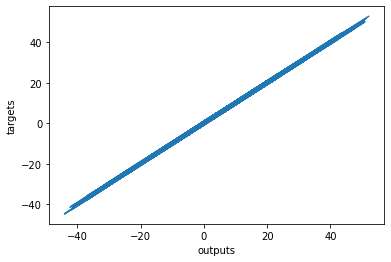

In [96]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [54]:
# We can see that we indeed have a linear relationship